In [1]:
%matplotlib inline

from sklearn.model_selection import train_test_split
import pandas as pd

import re
import seaborn as sns

import mglearn

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import mglearn

import warnings

import urllib
import zipfile
from pathlib import Path
from datetime import datetime, timedelta

import math

warnings.filterwarnings('ignore')

pd.options.display.precision = 2

In [2]:
file = r'C:\Users\groov\PythonCode\data\Mushrooms\Mushrooms.csv'
df = pd.read_csv(file) # quietly skip the many bad rows
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
from sklearn.preprocessing import LabelEncoder

def label_encode(df, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(df[col].unique())
        le_fitted = le.fit(col_values_unique)

        col_values = list(df[col].values)
        le.classes_
        col_values_transformed = le.transform(col_values)
        df[col] = col_values_transformed

to_be_encoded_cols = df.columns.values
label_encode(df, to_be_encoded_cols)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [4]:
clean_df = df.copy()

y = clean_df['class']

clean_df.drop('class', axis=1, inplace=True)

X = clean_df

In [5]:
print("X: {}, Y: {}".format(X.shape, y.shape))

X: (8124, 22), Y: (8124,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1337)
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8040,0,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,8,4,2
206,0,2,8,1,0,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,1
2165,5,0,2,1,5,1,0,0,5,1,...,2,7,6,0,2,1,4,3,5,0
221,5,2,8,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,1
1586,5,0,4,1,5,1,0,0,7,1,...,2,3,3,0,2,1,4,3,4,0


In [7]:
def plot_feature_importances(clf, columns):
    n_features = X.shape[1]
    height = n_features * 0.3
    width = height * 1.2
    plt.figure(figsize=(width,height))
    plt.barh(range(n_features), clf.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [8]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, random_state=1337, n_jobs=-1, max_features=5, max_depth=7)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.9998
Accuracy on test set: 0.9995


In [9]:
from sklearn.metrics import classification_report

predictions = forest.predict(X_test)
print(classification_report(y_test, predictions, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       1.00      1.00      1.00      1042
          1       1.00      1.00      1.00       989

avg / total       1.00      1.00      1.00      2031



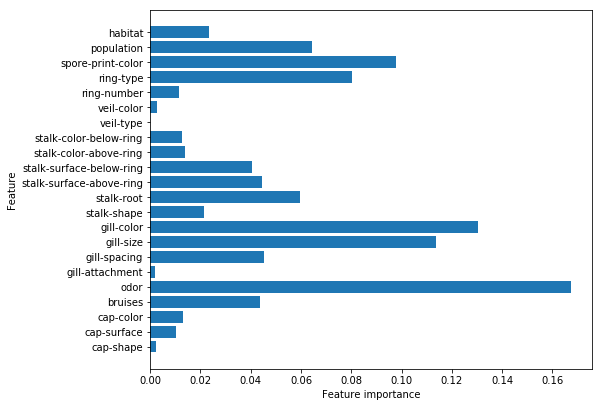

In [10]:
columns = X_train.columns
plot_feature_importances(forest, columns)

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(max_features=5, max_depth=7, learning_rate=0.1, n_estimators=500)
clf.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 1.00


In [12]:
from sklearn import neighbors, datasets
n_neighbors = 12 #optimized value

clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

Accuracy on training set: 0.996
Accuracy on test set: 0.996


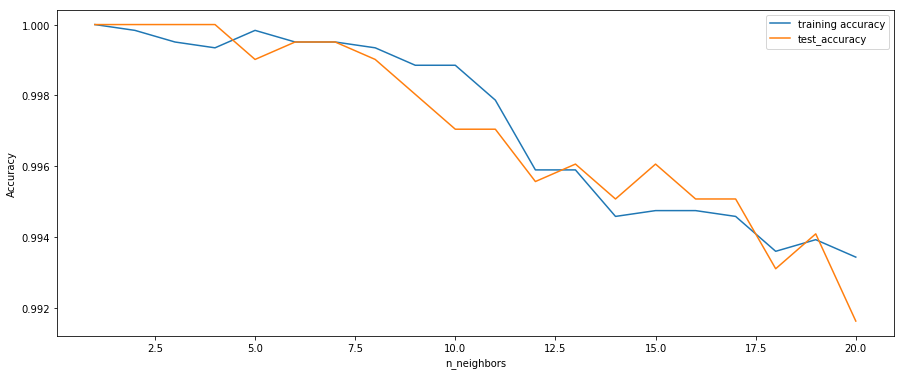

In [13]:
train_acc = []
test_acc = []

neighbors_settings = range(1, 21)

for n_neighbors in neighbors_settings:
    
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X_train, y_train)
    
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))
    
plt.figure(figsize=(15,6))
plt.plot(neighbors_settings, train_acc, label='training accuracy')
plt.plot(neighbors_settings, test_acc, label='test_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

In [14]:
from sklearn.svm import SVC
svm = SVC(random_state=0, gamma=0.01, C=1)
svm.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test, y_test)))

Accuracy on training set: 0.99
Accuracy on test set: 0.994


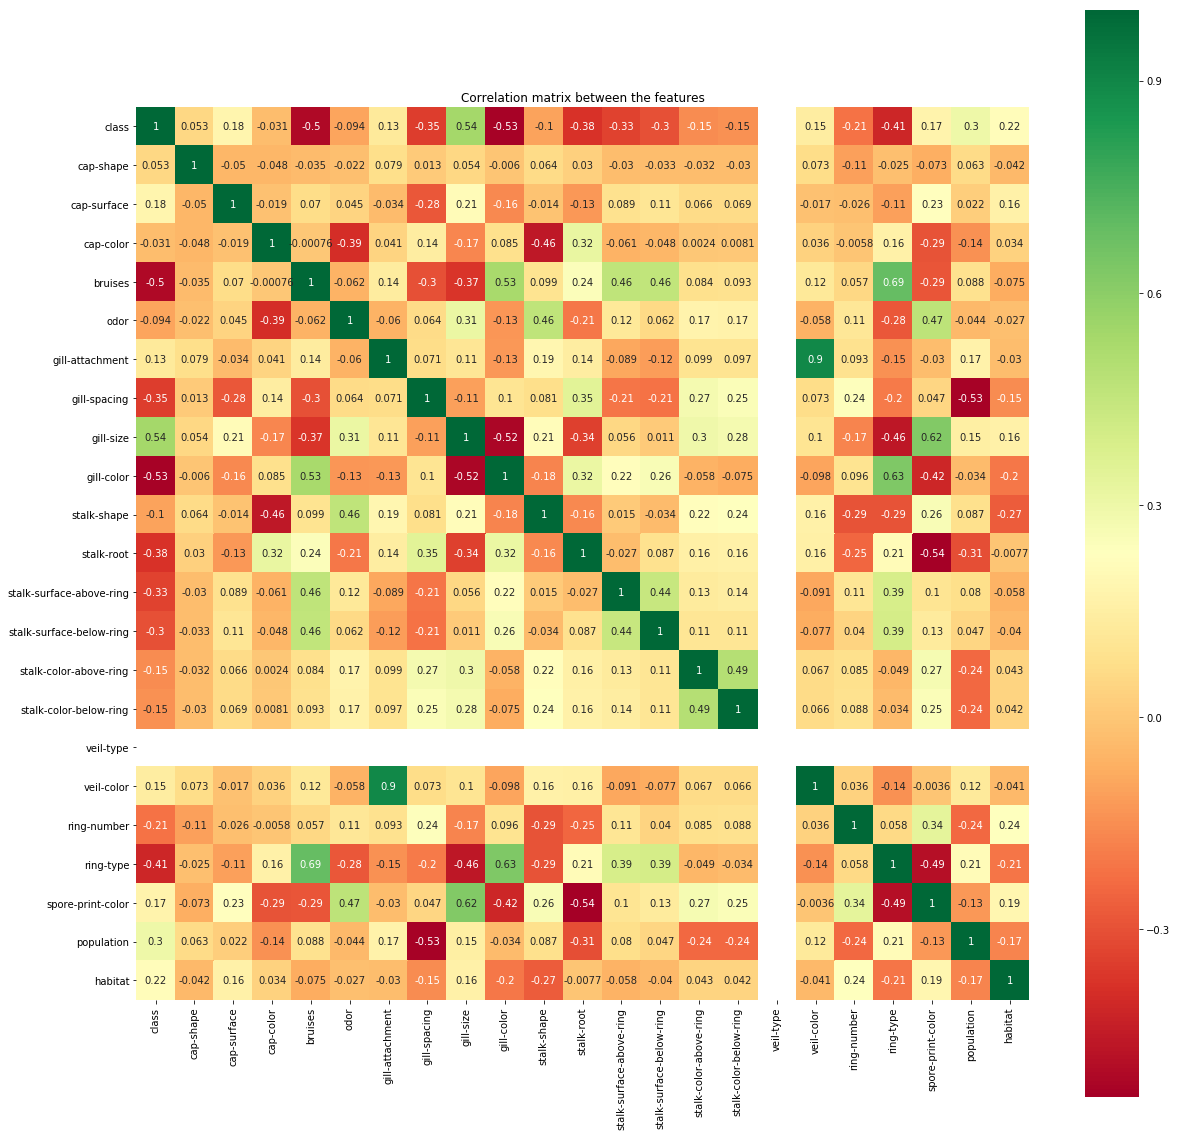

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(20,20))
ax = sns.heatmap(correlation_matrix, vmax=1, square=True,annot=True,cmap='RdYlGn')
plt.title('Correlation matrix between the features')
plt.show()

In [16]:
# onehotencoding would make correlation more effective
# then, let's cut out the features that aren't helpful
# then let's simplify the model to only use features that matter

In [17]:
file = r'C:\Users\groov\PythonCode\data\Mushrooms\Mushrooms.csv'
df = pd.read_csv(file) # quietly skip the many bad rows

# onehotencode everything except class

y = df['class']

df.drop('class', axis=1, inplace=True)

for col in df.columns.values:
    ohc = pd.get_dummies(df[col], prefix=col)
    df = df.join(ohc)
    df.drop(col, axis=1, inplace=True)
    #print(ohc)
    
df = df.join(y)

y = np.where(df['class'].str.contains('p'), 1, 0)
df.drop('class', axis=1, inplace=True)
df['class'] = y

# drop features we no longer want for simplicity

df.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [18]:
clean_df = df.copy()

y = clean_df['class']

clean_df.drop('class', axis=1, inplace=True)

X = clean_df

In [19]:
print("X: {}, Y: {}".format(X.shape, y.shape))

X: (8124, 117), Y: (8124,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1337)
X_train.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
8040,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
206,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2165,0,0,0,0,0,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
221,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1586,0,0,0,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [21]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, random_state=1337, n_jobs=-1)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.0000
Accuracy on test set: 1.0000


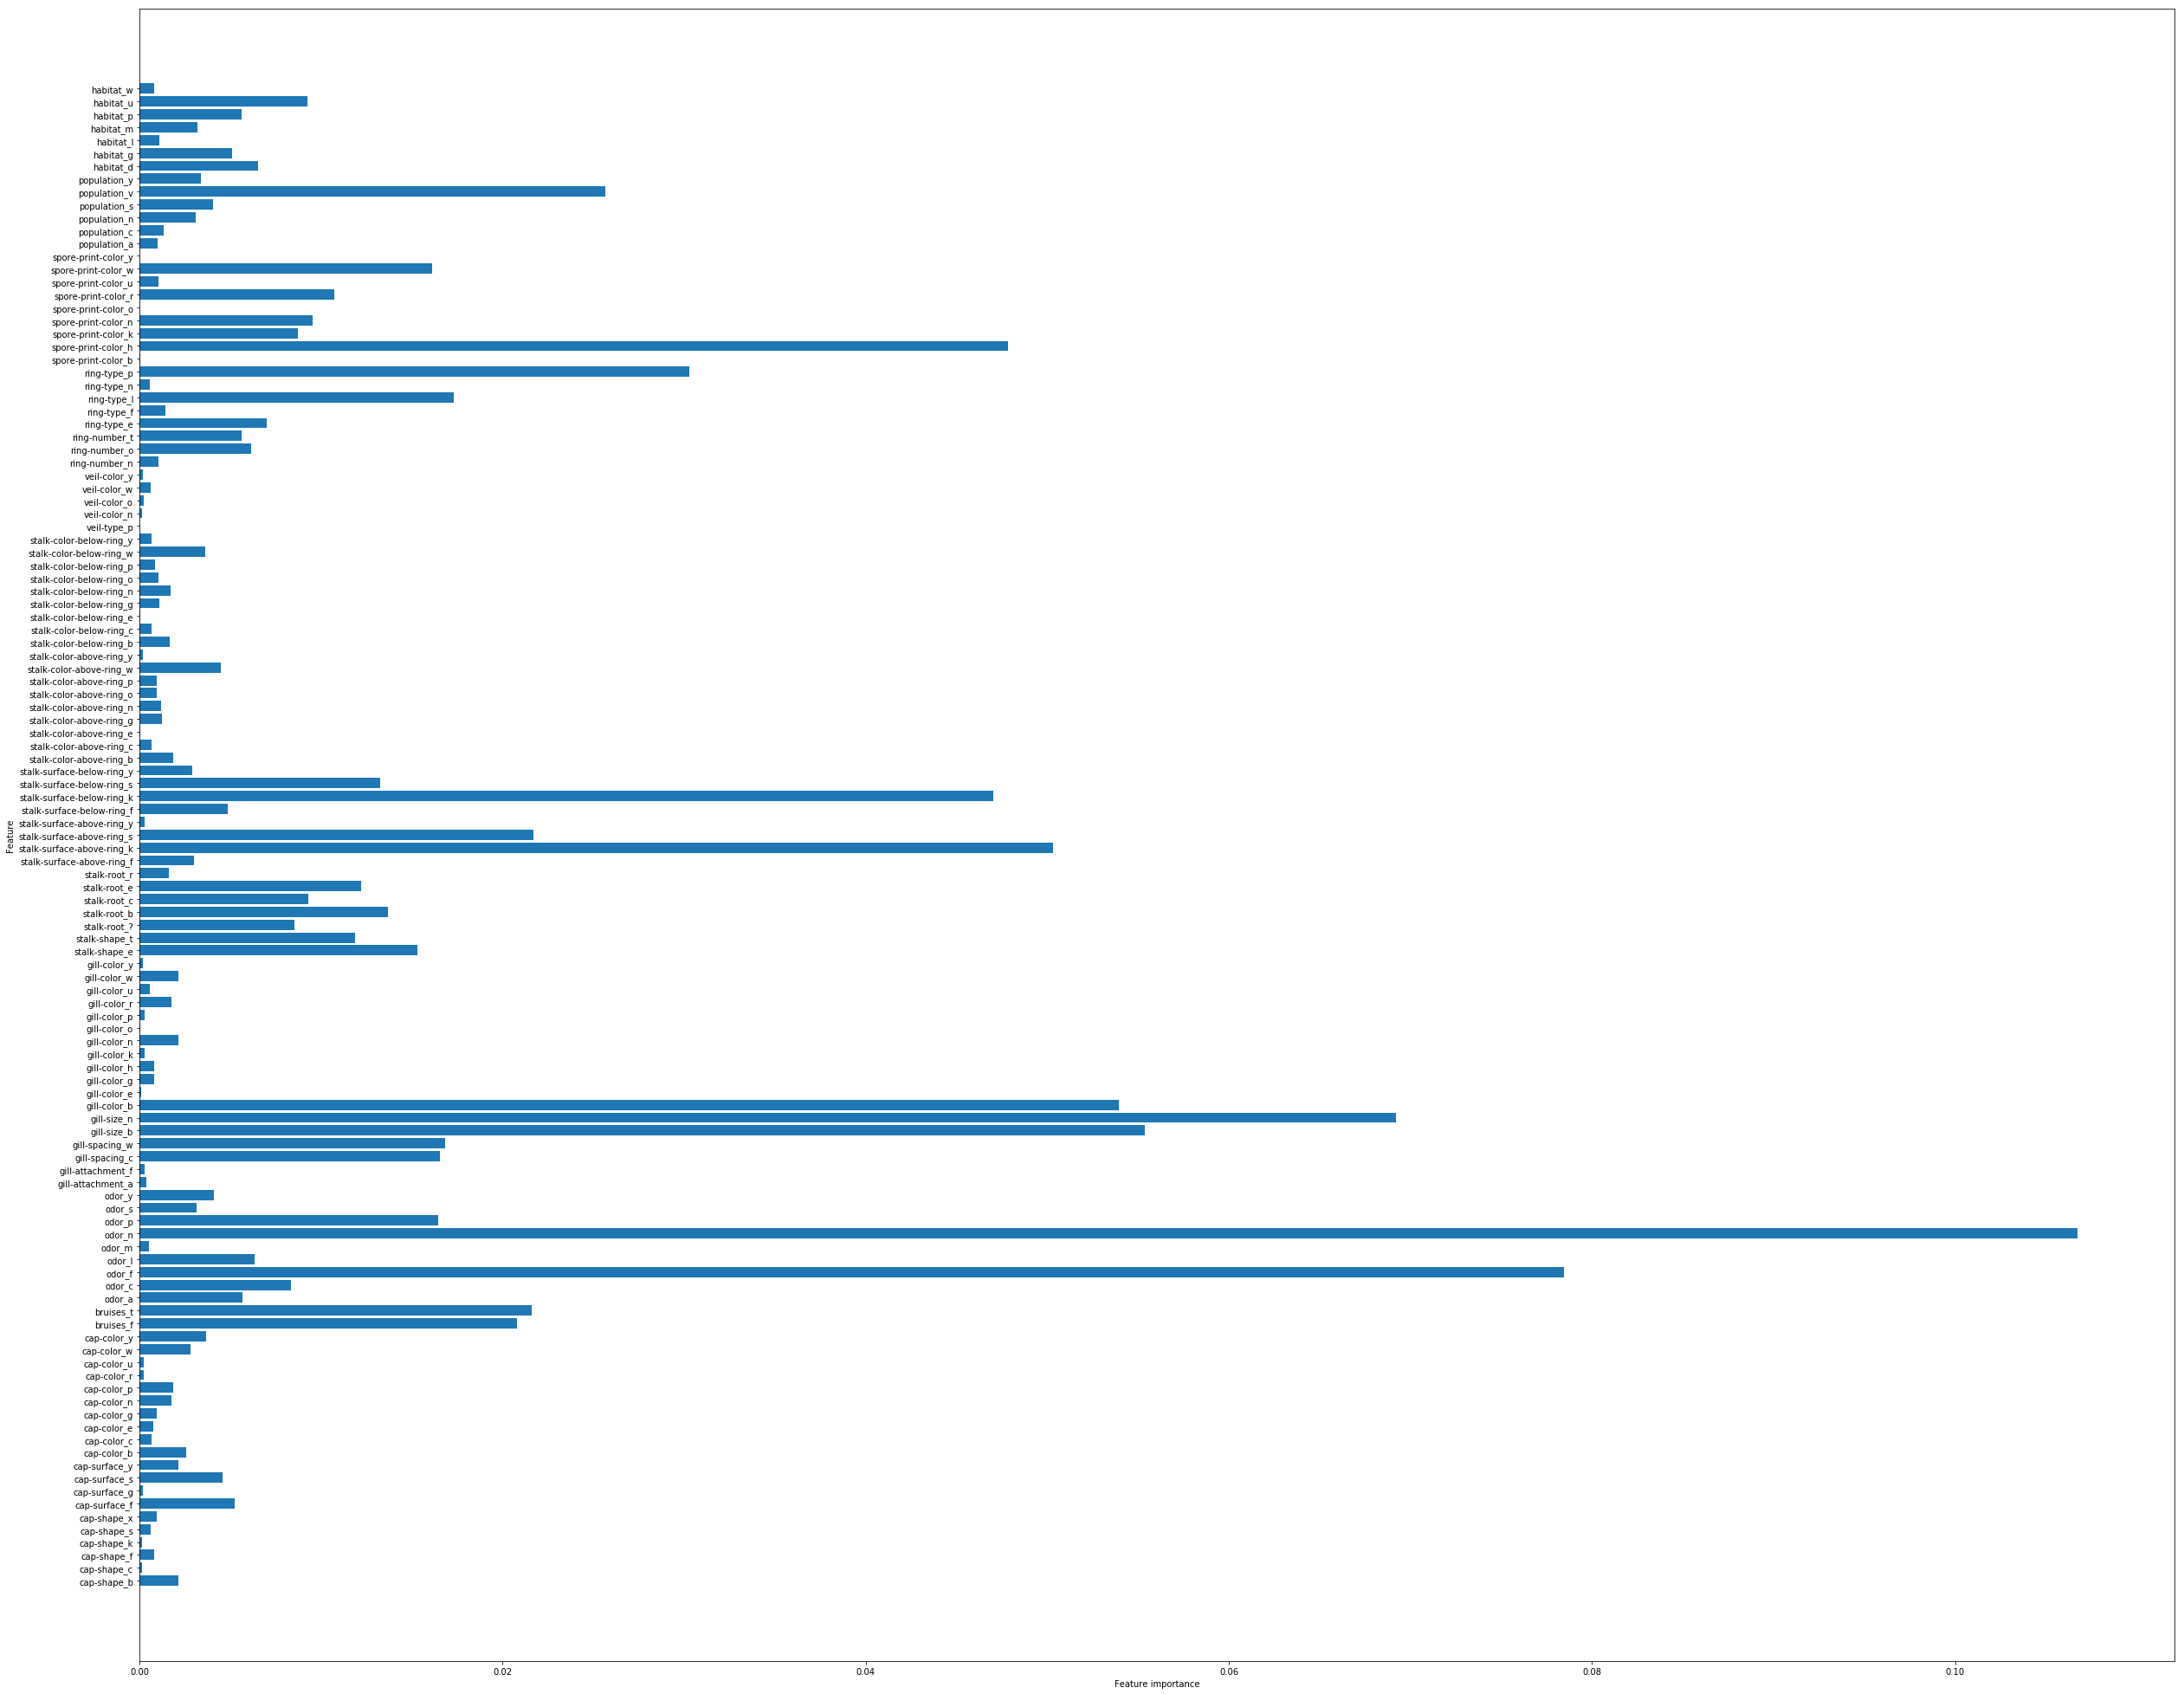

In [22]:
columns = X_train.columns
plot_feature_importances(forest, columns)

In [23]:
# drop weak predictors

importance = pd.DataFrame({'cols': clean_df.columns.values, 'value':forest.feature_importances_})
importance.sort_values(by='value', ascending=False, inplace=True)

threshold = 20
for feature in importance[threshold:]['cols']:
    clean_df.drop(feature, axis=1, inplace=True)
    
X = clean_df

In [24]:
print("X: {}, Y: {}".format(X.shape, y.shape))

X: (8124, 20), Y: (8124,)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1337)
X_train.head()

,bruises_f,bruises_t,odor_f,odor_n,odor_p,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,stalk-shape_e,stalk-root_b,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-below-ring_k,ring-type_l,ring-type_p,spore-print-color_h,spore-print-color_w,population_v
8040,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1
206,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0
2165,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0
221,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0
1586,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1


In [26]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, random_state=1337, n_jobs=-1, max_features=4, max_depth=4)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.9883
Accuracy on test set: 0.9916


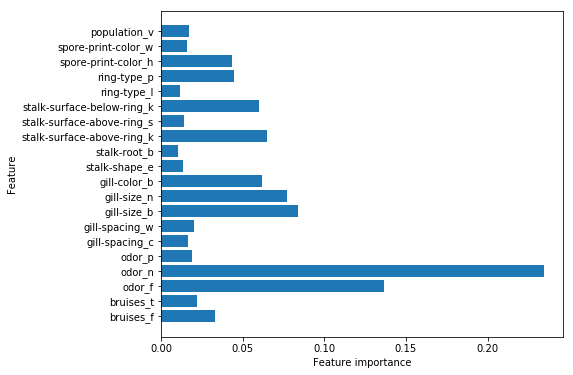

In [27]:
columns = X_train.columns
plot_feature_importances(forest, columns)

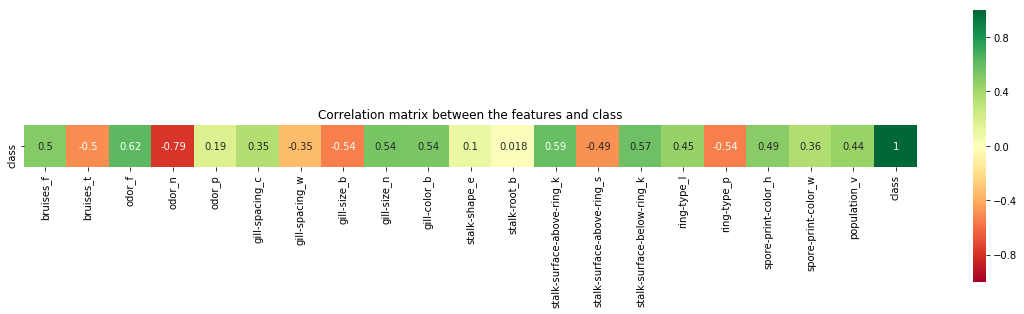

In [28]:
# much cleaner way to show a correlation heat map for class
correlation_matrix = clean_df.join(y).corr()[-1:]
plt.figure(figsize=(20,5))
ax = sns.heatmap(correlation_matrix, vmax=1, vmin=-1, square=True,annot=True,cmap='RdYlGn')
plt.title('Correlation matrix between the features and class')
plt.show()

In [29]:
forest = RandomForestClassifier(n_estimators=500, random_state=1337, n_jobs=-1, max_features=4, max_depth=4)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.9883
Accuracy on test set: 0.9916


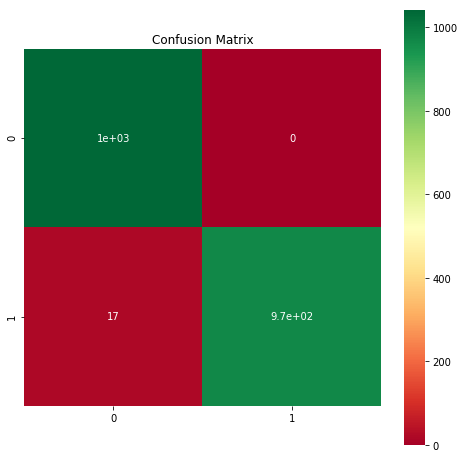

In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, forest.predict(X_test))
plt.figure(figsize=(8,8))
ax = sns.heatmap(confusion_matrix, square=True,annot=True,cmap='RdYlGn')
plt.title('Confusion Matrix')
plt.show()

In [31]:
#for max_features in range(1, 8):
#    for max_depth in range(1, 8):
        
        #forest = RandomForestClassifier(n_estimators=500, random_state=1337, n_jobs=-1, max_features=max_features, max_depth=max_depth)
        #forest.fit(X_train, y_train)

        #print("Accuracy on training set: {:.4f}".format(forest.score(X_train, y_train)))
        #print("Test Accuracy: {:.4f} (f:{}, d:{})".format(forest.score(X_test, y_test), max_features, max_depth))

In [32]:
# optimized RF
forest = RandomForestClassifier(n_estimators=500, random_state=1337, n_jobs=-1, max_features=1, max_depth=7)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.0000
Accuracy on test set: 1.0000


In [33]:
forest.predict(X_test)

array([1, 0, 0, ..., 1, 0, 0])

In [34]:
from sklearn.metrics import classification_report

predictions = forest.predict(X_test)
print(classification_report(y_test, predictions, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       1.00      1.00      1.00      1042
          1       1.00      1.00      1.00       989

avg / total       1.00      1.00      1.00      2031



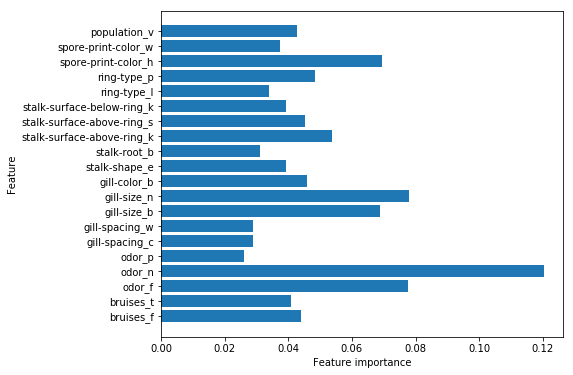

In [35]:
# these are the final importances after tuning RF
columns = X_train.columns
plot_feature_importances(forest, columns)

In [36]:
# optimized GB

clf = GradientBoostingClassifier(max_features=5, max_depth=7, learning_rate=0.1, n_estimators=500)
clf.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 1.00


In [37]:
# optimized knn

n_neighbors = 10

clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 1.000


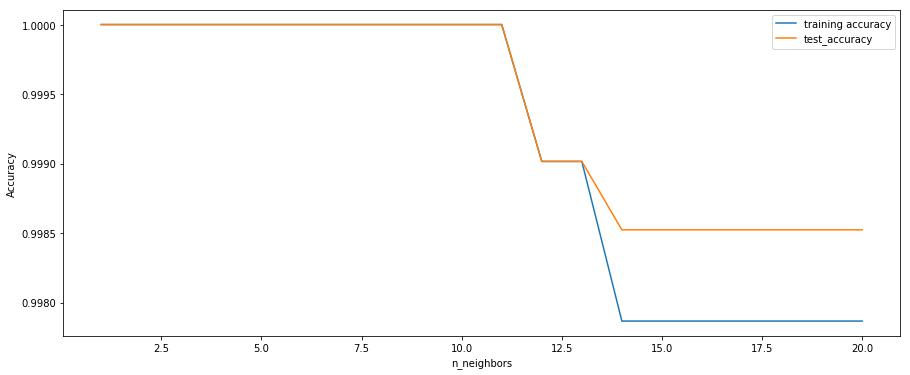

In [38]:
# removing features made knn less choppy as well

train_acc = []
test_acc = []

neighbors_settings = range(1, 21)

for n_neighbors in neighbors_settings:
    
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X_train, y_train)
    
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))
    
plt.figure(figsize=(15,6))
plt.plot(neighbors_settings, train_acc, label='training accuracy')
plt.plot(neighbors_settings, test_acc, label='test_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

In [39]:
svm = SVC(random_state=0, gamma=0.01, C=100)
svm.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 1.000
